In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm, chi2, t, uniform, skewnorm

<font color=yellow>Some defined functions and distributions dictionary</font>

In [2]:
# define a function to compute the G3 statistic, return the statistic and p-value
def JB_statistics(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples 
        and n is sample size
    Output:
        JB_statistic: A numpy array of shape (N,) containing the JB statistic for each sample
        p-value: A numpy array of shape (N,) containing the p-value for each sample
    """
    n = X.shape[1]
    JB_skewness = np.sqrt(n / 6) * skew(X, axis=1, bias=False)
    JB_kurtosis = kurtosis(X, axis=1, bias=False, fisher=True) * np.sqrt(n / 24)
    JB_statistic = JB_skewness**2 + JB_kurtosis**2
    p_value = 1 - chi2.cdf(JB_statistic, 2)
    return JB_statistic, p_value

# Define the distributions and their parameters
# create a dictionary as above, but use scipy.stats to generate the random numbers  
distributions = {
    'Normal': lambda size: norm.rvs(size=size),
    'T(3)': lambda size: t.rvs(df=3, size=size),
    'T(10)': lambda size: t.rvs(df=10, size=size),
    'T(30)': lambda size: t.rvs(df=30, size=size),
    'Uniform': lambda size: uniform.rvs(loc=-3, scale=6, size=size),
    'Chi_2(20)': lambda size: chi2.rvs(df=20, size=size),
    'skewed Normal(2)': lambda size: skewnorm.rvs(a=2, loc=0, scale=1, size=size),
    'skewed Normal(-4)': lambda size: skewnorm.rvs(a=-4, loc=0, scale=1, size=size)
}

# Function to generate data from a specified distribution
def generate_data(distribution_name, size):
    if distribution_name in distributions:
        return distributions[distribution_name](size)
    else:
        raise ValueError(f"Distribution '{distribution_name}' is not supported.")

# create a dictionary to ccompute PDF values for each distribution
pdf_functions = {
    'Normal': lambda x: norm.pdf(x),
    'T(3)': lambda x: t.pdf(x, df=3),
    'T(10)': lambda x: t.pdf(x, df=10),
    'T(30)': lambda x: t.pdf(x, df=30),
    'Uniform': lambda x: uniform.pdf(x, loc=-3, scale=6),
    'Chi_2(20)': lambda x: chi2.pdf(x, df=20),
    'skewed Normal(2)': lambda x: skewnorm.pdf(x, a=2, loc=0, scale=1),
    'skewed Normal(-4)': lambda x: skewnorm.pdf(x, a=-4, loc=0, scale=1)
}
# function to plot PDF
def plot_pdf(distribution_name):
    x = np.linspace(-10, 10, 1000)
    y = pdf_functions[distribution_name](x)
    plt.plot(x, y, label=distribution_name)
    plt.title(f'PDF of {distribution_name} Distribution')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

<font color=yellow>Function to compute various normality tests</font>

In [ ]:
from scipy.stats import norm, jarque_bera, shapiro, normaltest, anderson, kstest
# function to perform normality tests
def perform_normality_tests(data):
    results = {}
    # JB statistics
    jb_stat, jb_p = JB_statistics(data)
    results['JB statistics'] = (jb_stat, jb_p)
    # Jarque-Bera test
    jb_stat, jb_p = jarque_bera(data, axis=1)
    results['Jarque-Bera'] = (jb_stat, jb_p)
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(data, axis=1)
    results['Shapiro-Wilk'] = (shapiro_stat, shapiro_p)
    # D'Agostino's K-squared test
    dagostino_stat, dagostino_p = normaltest(data, axis=1)
    results["D'Agostino's K-squared"] = (dagostino_stat, dagostino_p)
    # Anderson-Darling test
    anderson_result = anderson(data, dist='norm')
    results['Anderson-Darling'] = anderson_result
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(data, 'norm', axis=1, args=(np.mean(data, axis=1), np.std(data, axis=1)))
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p)
    return results

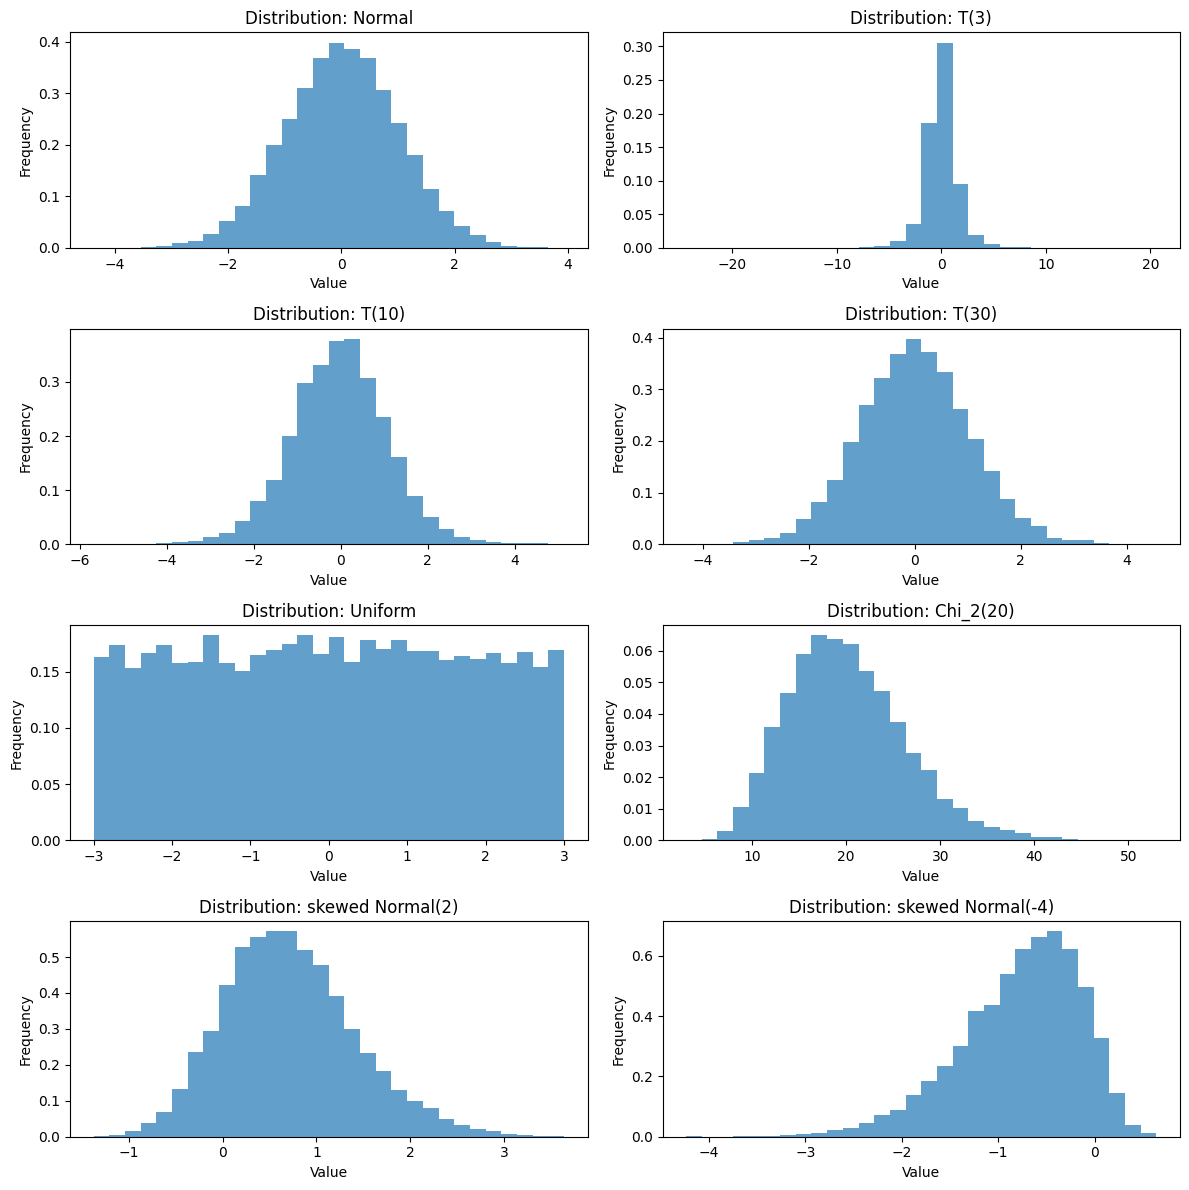

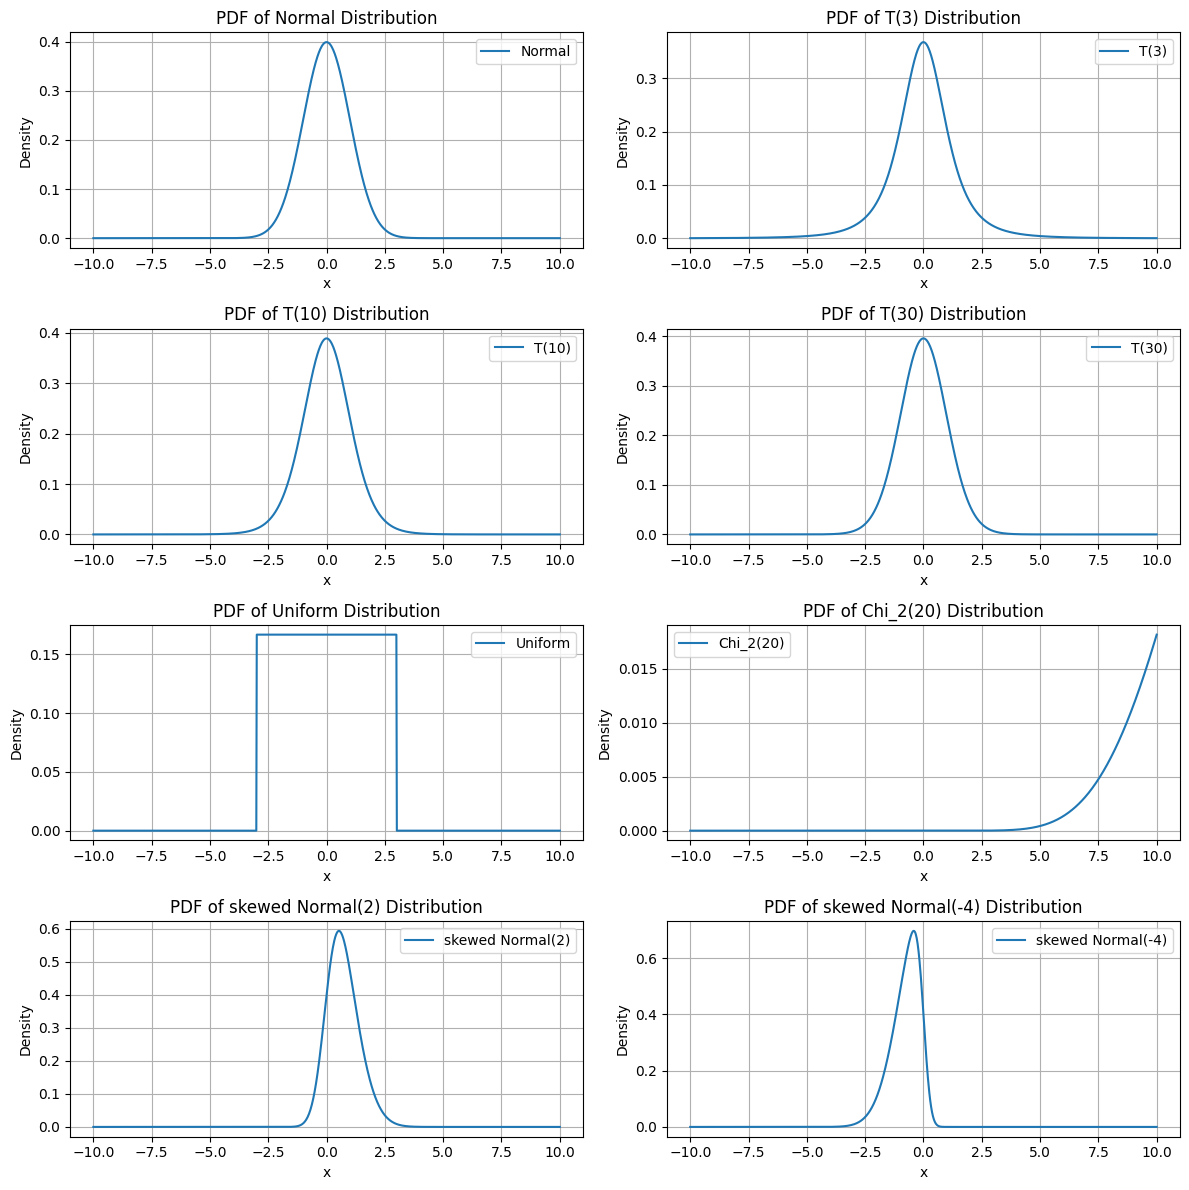

In [4]:
# Example usage
size = 10000
distribution_names = ['Normal', 'T(3)', 'T(10)', 'T(30)', 'Uniform', 'Chi_2(20)', 'skewed Normal(2)', 'skewed Normal(-4)']

# Generate and plot data in a 4x2 subplot
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()
for i, name in enumerate(distribution_names):
    data = generate_data(name, size)
    axs[i].hist(data, bins=30, density=True, alpha=0.7)
    axs[i].set_title(f'Distribution: {name}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    # axs[i].legend()
plt.tight_layout()
plt.show()

# Generate and plot PDFs in a 4x2 subplot
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()
for i, name in enumerate(distribution_names):
    x = np.linspace(-10, 10, 1000)
    y = pdf_functions[name](x)
    axs[i].plot(x, y, label=name)
    axs[i].set_title(f'PDF of {name} Distribution')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('Density')
    axs[i].legend()
    axs[i].grid()
plt.tight_layout()
plt.show()